In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as implt
from PIL import Image 

In [3]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from src.visualization import plot_acc_loss
from src.data import make_dataset_224x224x3, dataset_train, dataset_val

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Activation, Flatten
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.applications import VGG16
from keras.callbacks import  ModelCheckpoint

In [6]:
process_train = '../data/processed/train/'
process_test = '../data/processed/test/'
process_val = '../data/processed/val/'

test_data = '../data/raw/test/'

category_names = ['messy/', 'clean/']

# VGG 16

this convolution neural network is based on CNN VGG 16

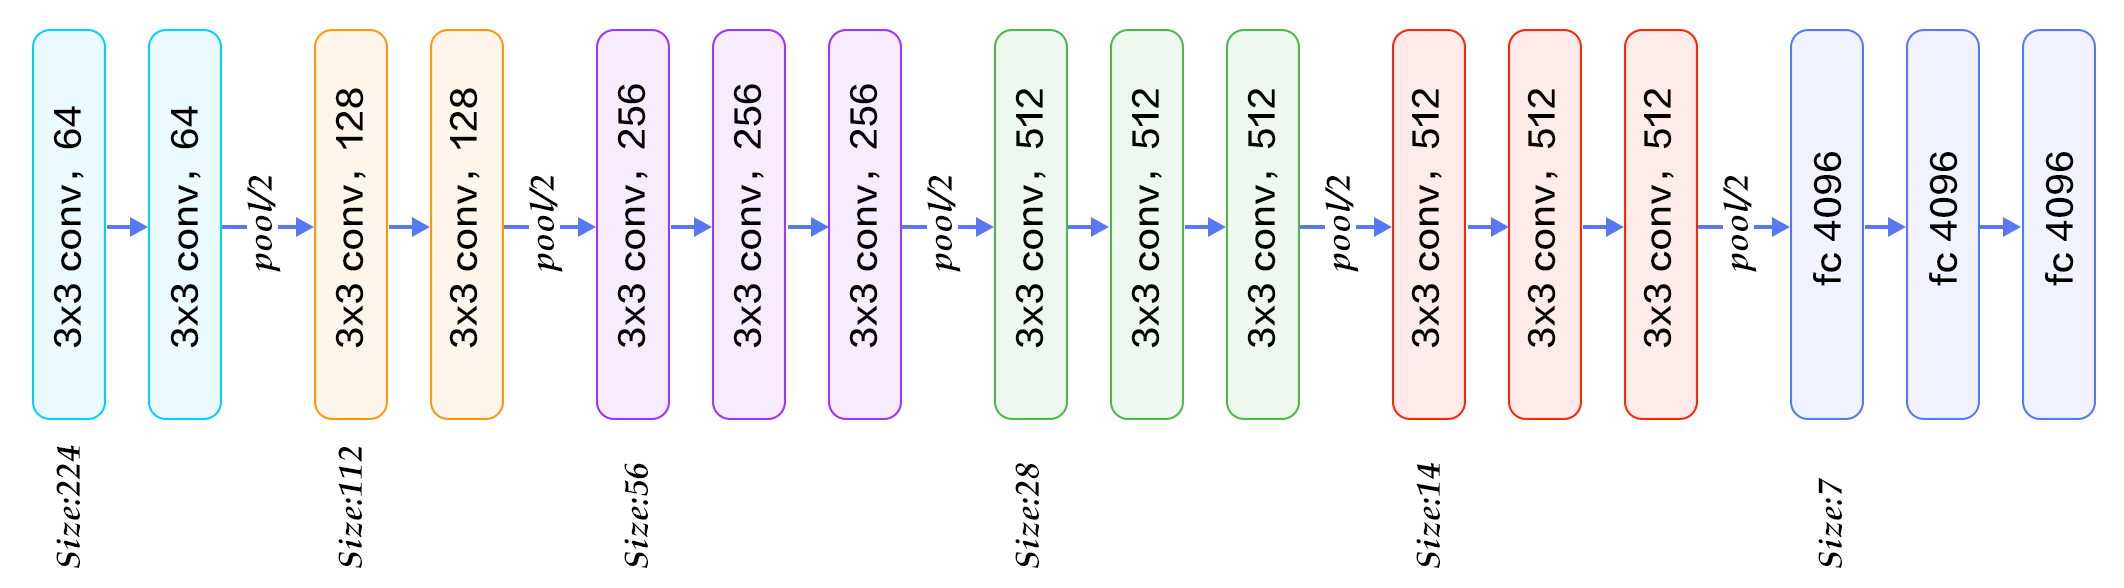

In [7]:
Image.open('../docs/vgg16.png')

In [8]:
make_dataset_224x224x3()

In [9]:
x_train, y_train = dataset_train()
x_val, y_val = dataset_val()

print('train x = ', x_train.shape)
print('train y = ', y_train.shape)
print('val x = ', x_val.shape)
print('val y = ', y_val.shape)

train x =  (192, 224, 224, 3)
train y =  (192,)
val x =  (20, 224, 224, 3)
val y =  (20,)


# Model VGG16

In [10]:
def build_classifier():
    model = Sequential()

    model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(x_train.shape[1:]) ) )
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(MaxPool2D( pool_size=(2,2), strides=(2,2) ))
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(MaxPool2D( pool_size=(2,2), strides=(2,2) ))
    
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(MaxPool2D( pool_size=(2,2), strides=(2,2) ))
    
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(MaxPool2D( pool_size=(2,2), strides=(2,2) ))
    
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(MaxPool2D( pool_size=(2,2), strides=(2,2) ))
    
    model.add(Flatten())
    model.add(Dense(4096 , activation="relu"))
    model.add(Dense(4096 , activation="relu"))
    model.add(Dense(1 , activation="sigmoid"))
    
    return model

In [11]:
model = build_classifier()

# Summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [13]:
optimizer = Adam(lr = 0.0001)

In [14]:
model.compile( optimizer, loss='binary_crossentropy', metrics = ['accuracy'] )

In [15]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 40, validation_data = (x_val, y_val) )

Epoch 1/40
6/6 [==============================] - 286s 48s/step - loss: 0.6950 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/40
6/6 [==============================] - 267s 45s/step - loss: 0.6934 - accuracy: 0.4094 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/40
6/6 [==============================] - 259s 44s/step - loss: 0.6931 - accuracy: 0.5134 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/40
6/6 [==============================] - 244s 41s/step - loss: 0.6931 - accuracy: 0.5300 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/40
6/6 [==============================] - 233s 39s/step - loss: 0.6931 - accuracy: 0.4657 - val_loss: 0.6921 - val_accuracy: 0.6500
Epoch 6/40
6/6 [==============================] - 328s 58s/step - loss: 0.6902 - accuracy: 0.6790 - val_loss: 0.6721 - val_accuracy: 0.5500
Epoch 7/40
6/6 [==============================] - 436s 73s/step - loss: 0.6610 - accuracy: 0.5799 - val_loss: 0.6327 - val_accuracy: 0.6500
Epoch 8/40
6/6 [====

In [16]:
model.save('../models/model_vgg16')

INFO:tensorflow:Assets written to: ../models/model_vgg16/assets


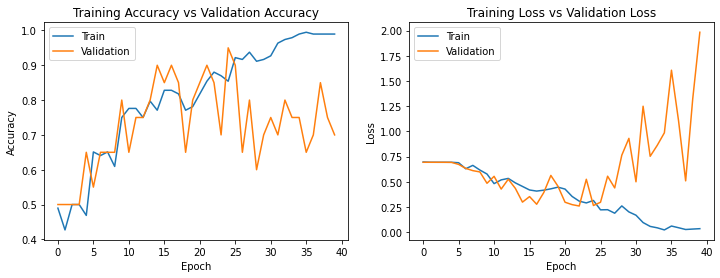

In [17]:
plot_acc_loss(history)

# Conclusion
To train a neural network VGG16 is need one large data set, because the amount the weights. So in this case the best way the training this CNN it's using transfer learning.

In [18]:
def build_vgg16_transfer_learning():
    model = Sequential()
    # Transfer Learning
    model.add(VGG16( include_top = False, weights = 'imagenet',input_shape=(x_train.shape[1:])))
    model.add(Flatten())
    model.add(Dense(1 ,activation = 'sigmoid'))
    
    return model

In [19]:
model_vgg16 = build_vgg16_transfer_learning()

In [20]:
model_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25089     
Total params: 14,739,777
Trainable params: 14,739,777
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_vgg16.compile( optimizer, loss='binary_crossentropy', metrics = ['accuracy'] )

In [22]:
mcp_save = ModelCheckpoint('../models/model_vgg16_TL', save_best_only=True, monitor='val_loss', mode='min')

In [23]:
history = model_vgg16.fit(x_train, y_train, batch_size = 32, epochs = 40, validation_data = (x_val, y_val), callbacks=[mcp_save] )

Epoch 1/40
6/6 [==============================] - 220s 37s/step - loss: 0.7043 - accuracy: 0.6077 - val_loss: 6.6289 - val_accuracy: 0.5000
INFO:tensorflow:Assets written to: ../models/model_vgg16_TL/assets
Epoch 2/40
6/6 [==============================] - 222s 37s/step - loss: 3.0075 - accuracy: 0.5173 - val_loss: 0.6966 - val_accuracy: 0.4500
INFO:tensorflow:Assets written to: ../models/model_vgg16_TL/assets
Epoch 3/40
6/6 [==============================] - 223s 38s/step - loss: 0.7172 - accuracy: 0.5029 - val_loss: 0.7004 - val_accuracy: 0.5000
Epoch 4/40
6/6 [==============================] - 223s 37s/step - loss: 0.6914 - accuracy: 0.4934 - val_loss: 0.6926 - val_accuracy: 0.5000
INFO:tensorflow:Assets written to: ../models/model_vgg16_TL/assets
Epoch 5/40
6/6 [==============================] - 221s 38s/step - loss: 0.6919 - accuracy: 0.5656 - val_loss: 0.6726 - val_accuracy: 0.6000
INFO:tensorflow:Assets written to: ../models/model_vgg16_TL/assets
Epoch 6/40
6/6 [================

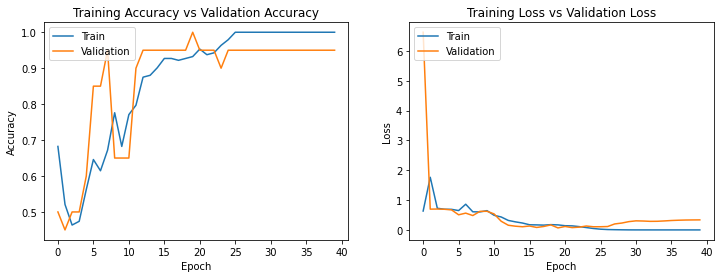

In [24]:
plot_acc_loss(history)